# ASSIGNED CSTR and energy balance

The production of propylene glycol occurs in a CSTR with a heat exchanger.
The reaction is $A + B \rightarrow C$

-   A = propylene oxide
-   B = water
-   C = propylene glycol

Initially the CSTR starts out with water in it at 75 °F in a 67 ft<sup>3</sup> reactor. The feed stream contains 80 lbmol/h of propylene oxide (A), 1000 lbmol of water (B) and 100 lbmol of methanol (M) which is inert.
The molar densities of each component are:

-   &rho;<sub>A</sub> 0.923 lbmol / ft<sup>3</sup>
-   &rho;<sub>B</sub> 3.45 lbmol/ft<sup>3</sup>
-   &rho;<sub>M</sub> 1.54 lbmol / ft<sup>3</sup>

You can assume these are independent of composition and temperature
Heat exchanger data:

-   UA = 16000 BTU/h/°F
-   coolant flowrate (mc) = 1000 lbmol / hour
-   coolant  heat capacity = 18 BTU/lbmol/°F
-   coolant temperature (Ta) = 60 °F

The rate of heat transfer is given by:

In [ ]:
Qdot = mc * Cpb * (Ta - T) * (1 - np.exp(-UA / (mc * Cpb)))

Heat capacity data

-   Cpa = 35 BTU/lbmol/°F
-   Cpb = 18 BTU/lbmol/°F
-   Cpc = 46 BTU / lbmol/°F
-   Cpm = 19.5 BTU / lbmol/°F

The heat of reaction is -36000 BTU/lbmol A, and is assumed to be constant.

The rate constant for the reaction is:

In [ ]:
k = 16.96e12 * np.exp(-32400.0 / 1.987 / (T + 460.0))

The reaction is pseudo-first order in A, so $-rA = k(T) C_A$.

The reactants decompose if they get above 170 °F.

1.  Estimate the maximum feed temperature you can use to avoid decomposition. Show a plot of the temperature vs. time.

2.  **Explain qualitatively why the temperature profile looks the way it does.**

3.  Estimate the exit concentration of propylene glycol for the feed temperature you found in part 1.

The following data is provided.

In [13]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

# molar flows
Fa0 = 80.0
Fb0 = 1000.0
Fc0 = 0.0
Fm0 = 100.0

# molar densities
rhoA = 0.923
rhoB = 3.45
rhoM = 1.54

UA = 16000.
Ta = 60.0  # coolant T
mc = 1000.0

# Heat capacities
Cpa = 35
Cpb = 18
Cpc = 46
Cpm = 19.5

Hrx = -36000.0

V = 67.0   # reactor volume
#Tfeed = ???

## solution

To solve this, we have to setup transient mole and energy balances and integrate them to see what the maximum temperature we achieve is. I suggest you iterate on Tfeed manually to find a value where the maximum doesn't exceed the decomposition temperature anywhere along the profile.

In [1]:
import numpy as np
from scipy.integrate import odeint

%matplotlib inline
from matplotlib import pyplot as plt

# molar flows
Fa0 = 80.0
Fb0 = 1000.0
Fc0 = 0.0
Fm0 = 100.0

# molar densities
rhoA = 0.923
rhoB = 3.45
rhoM = 1.54

UA = 16000.
Ta = 60.0  # coolant T
mc = 1000.0

# Heat capacities
Cpa = 35
Cpb = 18
Cpc = 46
Cpm = 19.5

Hrx = -36000.0

V = 67.0   # reactor volume

v0 = Fa0 / rhoA + Fb0 / rhoB + Fm0 / rhoM

Here are the transient mole and energy balances.

The maximum temperature is 169.5 degrees.


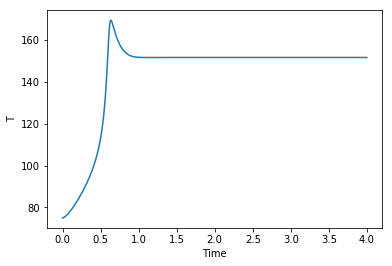

In [2]:
# Vary this to find the maximum temperature
Tfeed = 84


def odes(Y, t):
    Na, Nb, Nc, Nm, T = Y

    Ca = Na / V
    Fa, Fb, Fc, Fm = [n / V * v0 for n in [Na, Nb, Nc, Nm]]

    k = 16.96e12 * np.exp(-32400.0 / 1.987 / (T + 460.0))
    r = k * Ca
    ra = -r
    rb = -r
    rc = +r

    dNadt = Fa0 - Fa + ra * V
    dNbdt = Fb0 - Fb + rb * V
    dNcdt = Fc0 - Fc + rc * V
    dNmdt = Fm0 - Fm
    nCp = np.dot([Na, Nb, Nc, Nm], [Cpa, Cpb, Cpc, Cpm])

    Qdot = mc * Cpb * (Ta - T) * (1 - np.exp(-UA / (mc * Cpb)))

    dTdt = ((Fa0 * Cpa + Fb0 * Cpb + Fm0 * Cpm) * (Tfeed - T)
            -Hrx * r * V + Qdot) / nCp
    return [dNadt, dNbdt, dNcdt, dNmdt, dTdt]
#Y0 = [Fa0*V/v0, Fb0*V/v0, Fc0*V/v0, Fm0*V/v0, 75]
#print(Y0)
Y0 = [0, 3.45 * V, 0.0, 0.0, 75]
#print(Y0)
#print(v0)
tspan = np.linspace(0, 4, 500)
sol = odeint(odes, Y0, tspan)
Na, Nb, Nc, Nm, T = sol.T

print('The maximum temperature is {0:1.1f} degrees.'.format(max(T)))
plt.plot(tspan, T)
plt.xlabel('Time')
plt.ylabel('T')

A feed temperature of about 84 °F is the highest feed temperature that you can use to avoid exceeding the decomposition temperature.

Exit concentration is 0.1580122473218003 lbmol / ft^3


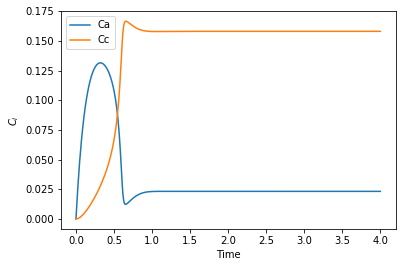

In [4]:
plt.figure()
plt.plot(tspan, Na / V, tspan, Nc / V)
plt.xlabel('Time')
plt.ylabel('$C_i$')
plt.legend(['Ca', 'Cc'])
print('Exit concentration is {} lbmol / ft^3'.format((Nc / V)[-1]))

2. qualitative explanation

The reaction is exothermic, so as it proceeds the reactor should get hotter. Evidently, the temperature rises quickly as the concentration of A rises, and then falls. At this point, the rate of heat generation is compensated by heat transfer out of the reactor. Once the CSTR reaches steady state, the rate of heat generation and removal becomes a constant.

3. See the exit concentration output from the code above.